# ***Title: Bank Marketing Analysis using Python***
# ***Created by- Suraj Sagar Chathiri***

Description: Analyzed European bank marketing data to explore customer demographics, loan behavior, and campaign effectiveness. Cleaned and visualized key patterns using Python (Pandas, Matplotlib), and built a logistic regression model to predict client subscription likelihood. Presented actionable insights on job-wise age trends, loan approval by marital status, and campaign outcomes by contact method.

   Unnamed: 0  age            job  marital            education  default  \
0       18964   54     technician  married  professional.course  unknown   
1        7432   33     management  married             basic.9y  unknown   
2        7598   49   entrepreneur  married    university.degree       no   
3       36071   27       services  married    university.degree       no   
4       35458   57       services  married          high.school       no   
5       23696   59        retired  married    university.degree       no   
6        2032   39      housemaid  married    university.degree       no   
7       20613   46     technician  married  professional.course       no   
8       25058   36     technician   single    university.degree       no   
9        7054   33  self-employed   single    university.degree       no   

  housing loan    contact month  ... campaign  pdays  previous     poutcome  \
0      no  yes   cellular   aug  ...        3    999         0  nonexistent   
1    

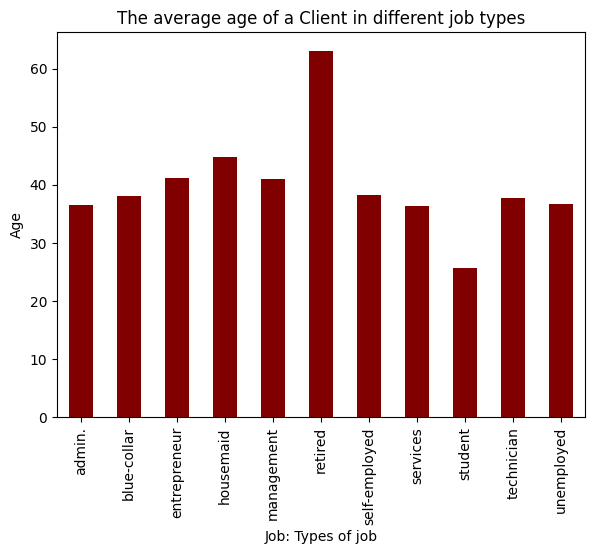


      Unnamed: 0  age            job  marital          education default  \
2           7598   49   entrepreneur  married  university.degree      no   
3          36071   27       services  married  university.degree      no   
4          35458   57       services  married        high.school      no   
5          23696   59        retired  married  university.degree      no   
6           2032   39      housemaid  married  university.degree      no   
...          ...  ...            ...      ...                ...     ...   
1995        8472   28       services   single        high.school      no   
1996       20319   40  self-employed   single  university.degree      no   
1997        3663   24       services  married        high.school      no   
1998       12225   32      housemaid  married           basic.9y      no   
1999       12192   40         admin.  married        high.school      no   

     housing  loan    contact month  ... campaign  pdays  previous  \
2        yes    

<ipython-input-8-3e3363d053cf>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan'] = df_cleaned['loan'].replace({'yes': 1, 'no': 0})


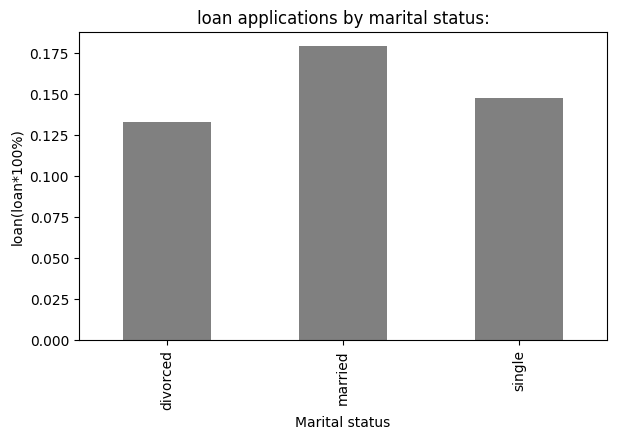


2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
Name: loan, dtype: int64
The average campaign through contact(either with cellular or telephone)
contact
cellular     2.423433
telephone    2.771255
Name: campaign, dtype: float64


<ipython-input-8-3e3363d053cf>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['contact'] = df_cleaned['contact']


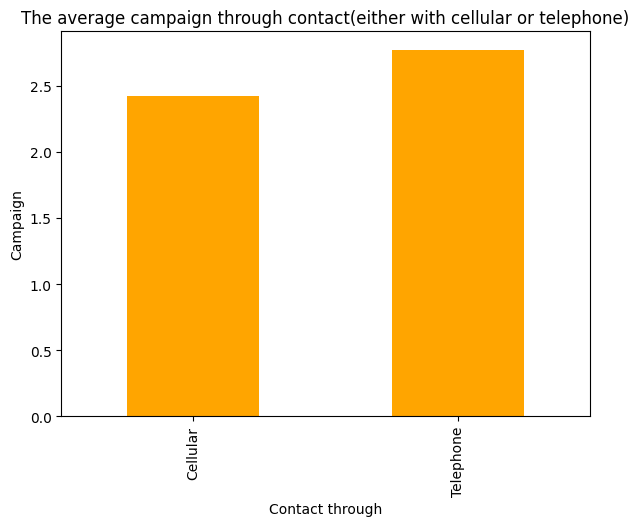

In [ ]:
import pandas as pd
import statsmodels.formula.api as api
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.linear_model import LogisticRegression

# Read the data set
bank = pd.read_csv('/content/bank_data.csv')
print(bank.head(10))
print(bank.info())
print()

# Display the first few rows of the processed DataFrame
print('Converting all object dtype to numerical:')
print(bank.head())
print(bank.info())

# Print the main characteristics of a dataset(descriptive statistics).
print(bank.describe())
print()

# Replace 'unknown' with numpy.nan
bank.replace('unknown', np.nan, inplace=True)

# Remove rows with missing data
df_cleaned = bank.dropna()
print(df_cleaned)
print(df_cleaned.head(20))

# Print the average age of a client.
print('Display the average age of a Client:')
ns = df_cleaned.groupby(['job'])['age'].mean()
print(ns)
print()

# Creating the bar plot.
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
ns.plot(kind='bar', color = 'maroon')
plt.title('The average age of a Client in different job types')
plt.xlabel('Job: Types of job')
plt.ylabel('Age')
plt.show()
print()

# Convert loan attribute from non numeric values to intergers(0's & 1's).
df_cleaned['loan'] = df_cleaned['loan'].replace({'yes': 1, 'no': 0})

# Print the DataFrame
print(df_cleaned)
ns1 = df_cleaned.groupby(['marital'])['loan'].mean()
print('The average loan applications by marital status:')
print(ns1)

# Creating the bar plot.
plt.figure(figsize=(15,4))
plt.subplot(1,2,2)
ns1.plot(kind='bar', color = 'grey')
plt.title('loan applications by marital status:')
plt.xlabel('Marital status')
plt.ylabel('loan(loan*100%)')
plt.show()
print()

# Convert loan attribute from non numeric values to intergers(0's & 1's).
df_cleaned['contact'] = df_cleaned['contact']
print(df_cleaned.loan.head(10))
ns2 = df_cleaned.groupby(['contact'])['campaign'].mean()
print('The average campaign through contact(either with cellular or telephone)')
print(ns2)

# Creating the bar plot.
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
ns2.plot(kind='bar', color = 'orange')
plt.title('The average campaign through contact(either with cellular or telephone)')
plt.xticks(ticks=[0, 1], labels=['Cellular', 'Telephone'])
plt.xlabel('Contact through')
plt.ylabel('Campaign')
plt.show()
print()

Based on the data you provided, here’s a breakdown of the loan applications by marital status:

Married: 17.92%
Divorced: 13.33%
Single: 14.76%
It appears that the dataset has a slightly higher proportion of married indivduals applying for loans than single or divorced individuals.

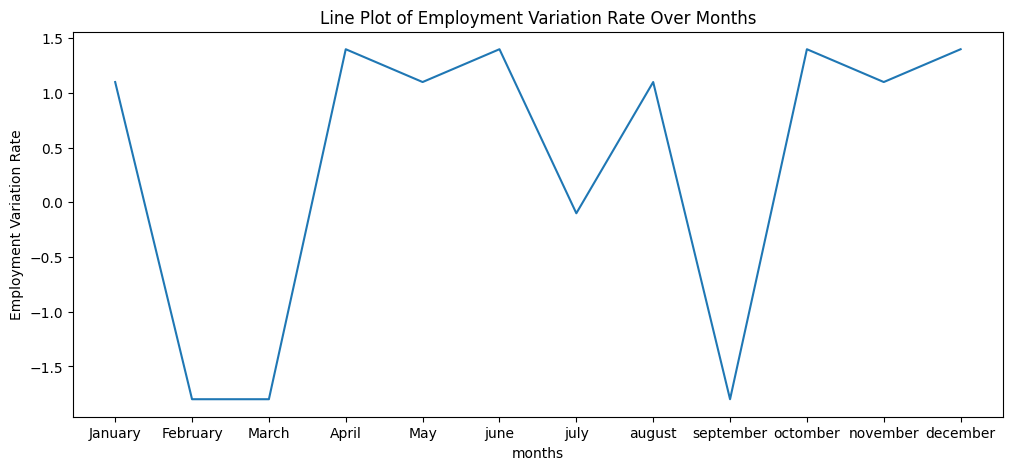

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot for months and Employment Variation Rate.
months = ['January', 'February', 'March', 'April', 'May', 'june', 'july', 'august', 'september','octomber', 'november', 'december']
category1_variation = df_cleaned['emp.var.rate']
category1_variation2 = category1_variation[:12]
plt.figure(figsize=(12, 5))
plt.title('Line Plot of Employment Variation Rate Over Months')
plt.xlabel('months')
plt.ylabel('Employment Variation Rate')
plt.plot(months, category1_variation2)
plt.show()

In [ ]:
#list of variables which needs to be changed
col = ['default','housing','loan','subscribed']

#function definition
def convert(x):
    return x.map({'yes':1,'no':0})

#calling the function
df_cleaned[col] = df_cleaned[col].apply(convert)
print("Header of the modified data:")
print(df_cleaned.head(10))
print()

print(df_cleaned.info())
print()

print("Descriptive statistics of the Modified data:")
print(df_cleaned.describe())
print()

Header of the modified data:
    Unnamed: 0  age            job   marital            education  default  \
2         7598   49   entrepreneur   married    university.degree        0   
3        36071   27       services   married    university.degree        0   
4        35458   57       services   married          high.school        0   
5        23696   59        retired   married    university.degree        0   
6         2032   39      housemaid   married    university.degree        0   
7        20613   46     technician   married  professional.course        0   
8        25058   36     technician    single    university.degree        0   
9         7054   33  self-employed    single    university.degree        0   
10       28696   45       services  divorced             basic.4y        0   
11       19469   30     technician   married          high.school        0   

    housing  loan    contact month  ... campaign  pdays  previous  \
2         1   NaN  telephone   may  ...    

<ipython-input-10-3fe632c847ca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].apply(convert)


In [ ]:
# perform Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
x = df_cleaned['age'].values.reshape(-1,1)
y = df_cleaned['subscribed'].values.reshape(-1,1)
model.fit(x,y)

df_cleaned['logistic_prediction'] = model.predict_proba(x)[:,1]

# print the header to look at the logistic regression probabilities.
print(df_cleaned.head())
print()

   Unnamed: 0  age           job  marital          education  default  \
2        7598   49  entrepreneur  married  university.degree        0   
3       36071   27      services  married  university.degree        0   
4       35458   57      services  married        high.school        0   
5       23696   59       retired  married  university.degree        0   
6        2032   39     housemaid  married  university.degree        0   

   housing  loan    contact month  ... pdays  previous     poutcome  \
2        1   NaN  telephone   may  ...   999         0  nonexistent   
3        0   NaN   cellular   may  ...   999         0  nonexistent   
4        1   NaN   cellular   may  ...   999         0  nonexistent   
5        1   NaN   cellular   aug  ...   999         0  nonexistent   
6        1   NaN  telephone   may  ...   999         0  nonexistent   

   emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
2           1.1         93.994          -36.4      4.864     

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-11-71c5494aaee2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['logistic_prediction'] = model.predict_proba(x)[:,1]


In [ ]:
# The 10 largest predicted probabilities.
print('The 10 largest predicted probabilities:')
print(df_cleaned.nlargest(10, 'logistic_prediction'))
print()

The 10 largest predicted probabilities:
      Unnamed: 0  age          job marital            education  default  \
20         16030   21     services  single          high.school        0   
258        39823   21      student  single          high.school        0   
246        38499   22      student  single             basic.6y        0   
412        11795   22   technician  single  professional.course        0   
482        38115   22     services  single  professional.course        0   
719        39802   22       admin.  single    university.degree        0   
1186       14255   22  blue-collar  single             basic.9y        0   
1588        8739   22     services  single          high.school        0   
111        38447   23   technician  single    university.degree        0   
389        41038   23      student  single          high.school        0   

      housing  loan    contact month  ... pdays  previous     poutcome  \
20          1   NaN   cellular   jul  ...   999  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
the_median = df_cleaned['logistic_prediction'].median()
print(the_median)

length_x = list(1*df_cleaned['logistic_prediction'] > the_median)
actual_y = list(df_cleaned['subscribed'])

print('Confusion matrix:')
print('[true positives   false positives]')
print('[false negatives   true negatives]')
print(confusion_matrix(length_x, actual_y))
print()

# Calculate the prediction accuracy from the confusion matrix.
conf_mat = confusion_matrix(length_x, actual_y)
precision = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])
print(f'Precision: {precision}')
print()

recall = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0])
print(f'recall: {recall}')
print()

0.12572963257089895
Confusion matrix:
[true positives   false positives]
[false negatives   true negatives]
[[688  83]
 [597  99]]

Precision: 0.8923476005188068

recall: 0.535408560311284



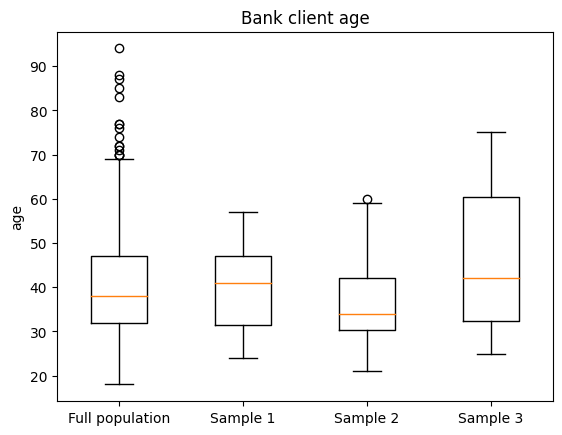

In [ ]:
# Create three samples of data.
sample1 = bank.sample(n=30, random_state=43)
sample2 = bank.sample(n=30)
sample3 = [26, 33, 39, 62, 45, 69, 28, 30, 47, 27,
           25, 34, 48, 67, 60, 53, 35, 38, 70, 75]

# Create boxplots to visualize data from samples.
fig1, ax1 = plt.subplots()
ax1.boxplot([bank['age'], sample1['age'], sample2['age'], np.array(sample3)])
ax1.set_title('Bank client age')
ax1.set_ylabel('age')
ax1.set_xticklabels(['Full population', 'Sample 1', 'Sample 2', 'Sample 3'])
plt.show()
print()

In [ ]:
# Print hypothesis
print('*H0: There is no difference between the sample 3 mean and the full population mean.')
print('*H1: The mean age of sample 3 is greater than that of the population.')

# Use ttests to compare group means.
print('Full population VS. Sample 1')
print(scipy.stats.ttest_ind(df_cleaned['age'], sample1['age']))
print()
print('Full population VS. Sample 2')
print(scipy.stats.ttest_ind(df_cleaned['age'], sample2['age']))
print()
print('Full population VS. Sample 3')
print(scipy.stats.ttest_ind(df_cleaned['age'], np.array(sample3)))
print()

*H0: There is no difference between the sample 3 mean and the full population mean.
*H1: The mean age of sample 3 is greater than that of the population.
Full population VS. Sample 1
TtestResult(statistic=-1.2159455120603921, pvalue=0.22419763914391636, df=1495.0)

Full population VS. Sample 2
TtestResult(statistic=1.190796700582939, pvalue=0.23392243849816372, df=1495.0)

Full population VS. Sample 3
TtestResult(statistic=-2.9412636974160433, pvalue=0.0033193953181189983, df=1485.0)

